## Cue maps for puff versus cue response amplitude 
These actually exist for all experiments where the mouse was running and there were puffs. Here I am plotting only for closed loop experiments where the puff was triggered to a position. 

In [1]:
# identify "closedloop" experiments 
from djexpcode.schemas import *
from djexpcode import *

nn,ss,area,enu = (TwoPhotonVolume()*TreadmillPositionExperiment()).fetch('session_name',
                                                                         'session_subname',
                                                                         'recording_area',
                                                                         'enucleated')
keys = []
for n,s,a,e in zip(nn,ss,area,enu):
    if 'closedLoop' in s:
        if not 'BlackLaps' in s:
            if e:
                e = 'enucleated'
            else:
                e = ''
            keys.append(dict(session_name=n,session_subname=s,area = a,enucleated = e))
print('Closed loop experiments:')
for k in keys:
    print('\t {area} \t {session_name} - {session_subname}  \t {enucleated}'.format(**k))

Connecting root@localhost:3306
Closed loop experiments:
	 S1 	 171201_EV038_2P_S1_JC - run00_closedLoopActuator  	 enucleated
	 S1 	 171201_EV038_2P_S1_JC - run01_closedLoopActuator  	 enucleated
	 V1 	 171201_EV038_2P_V1_JC - run00_closedLoopActuator  	 enucleated
	 V1 	 180208_JC060_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180208_JC060_2P_JC - run01_closedLoopActuator  	 
	 S1 	 181008_JC079_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run01_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run04_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run05_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run06_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run07_closedLoopActuator  	 
	 V1 	 180212_SK072_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180212_SK072_2P_JC - run01_closedLoopActuator  	 
	 V1 	 180212_SK072_2P_JC - run02_closedLoopActuator  	 
	 V1 	 180212_SK072_2P_JC - run03_closedLoopActuat

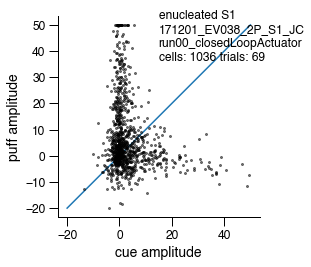

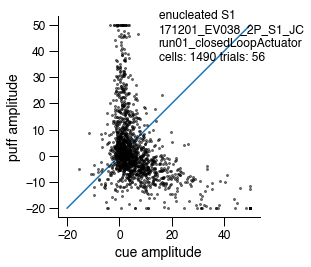

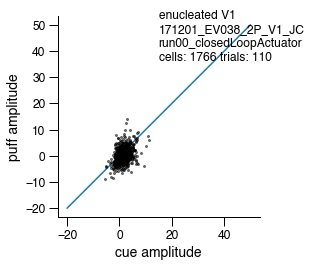

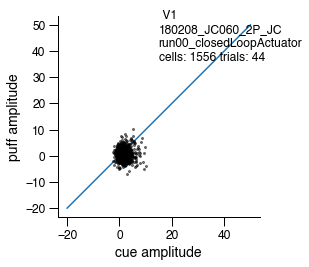

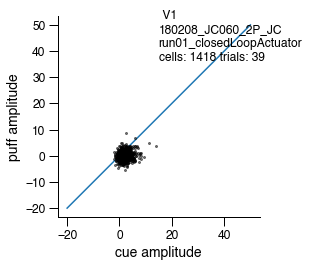

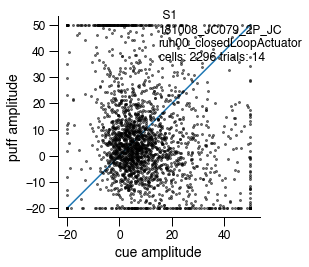

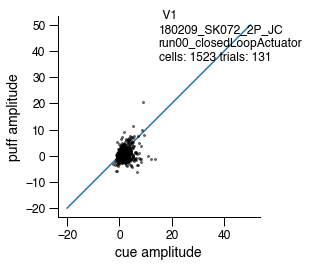

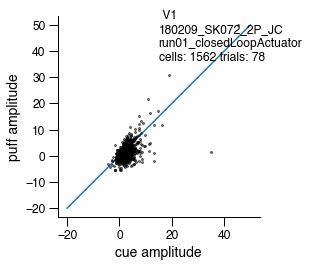

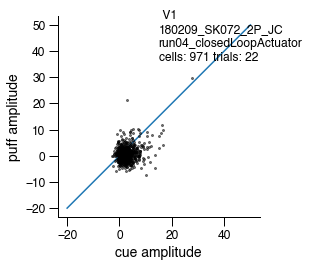

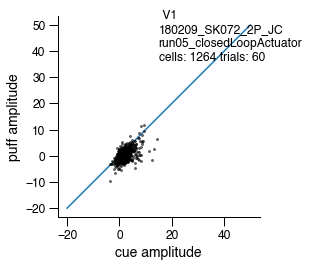

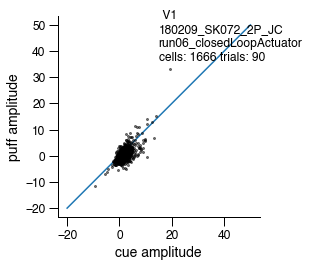

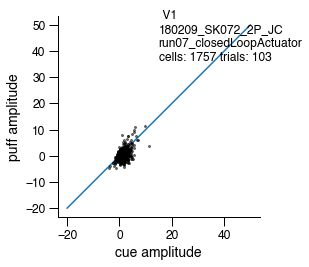

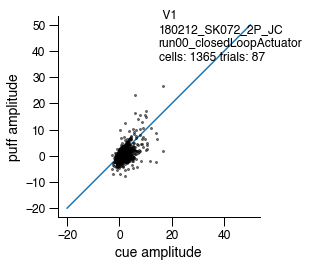

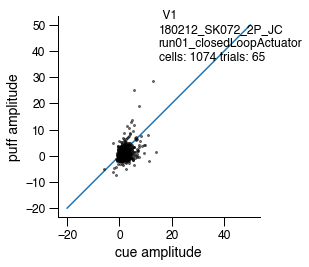

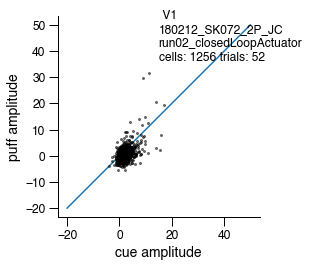

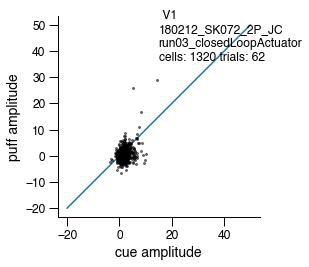

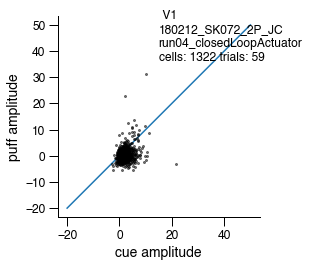

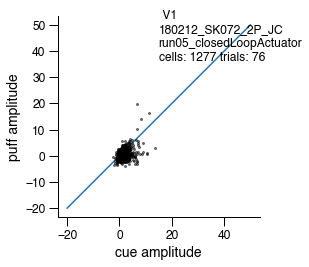

In [2]:
# Plot the experiments puff amplitude versus the cue amplitude
amin,amax = [-20,50]
%matplotlib inline
for k in keys:
    dat = (PositionMapsStats.ActivityMapStats()*StimulusAirPuff.Triggered() & k).fetch()
    if not len(dat): continue
    x,y = (dat['cue_amplitude'],dat['puff_response_amplitude'])
    fig = plt.figure(figsize=[5,4])
    fig.add_axes([0.3,0.2,0.6,0.7])
    plt.plot([amin,amax],[amin,amax],color = colors[2])
    plt.plot(np.clip(x,amin,amax),np.clip(y,amin,amax),'k.',alpha = 0.5)
    plt.axis([amin,amax,amin,amax])
    plt.title('''{enucleated} {area}
{session_name}
{session_subname}
cells: {ncells} trials: {ntrials}'''.format(
        **dict(k,
               ncells = len(dat),
               ntrials = dat[0]['puff_df_f'].shape[0])),
              fontsize = 12,va = 'top',ha = 'left')
    plt.gca().set_xlabel('cue amplitude')
    plt.ylabel('puff amplitude')
    plt.axis('square')

### Cumulatives of response amplitudes for S1 and V1 for closed loop experiments

<font color='red'>**IMPORTANT**:</font> I m leaving experiment **181008_JC079_2P_JC** out because the numbers are strange.. need to look at this one later.


{'session_name': '171201_EV038_2P_S1_JC', 'session_subname': 'run01_closedLoopActuator'} 1490
{'session_name': '171201_EV038_2P_V1_JC', 'session_subname': 'run00_closedLoopActuator'} 1766
{'session_name': '180208_JC060_2P_JC', 'session_subname': 'run01_closedLoopActuator'} 1418
{'session_name': '180209_SK072_2P_JC', 'session_subname': 'run07_closedLoopActuator'} 1757
{'session_name': '180212_SK072_2P_JC', 'session_subname': 'run05_closedLoopActuator'} 1277


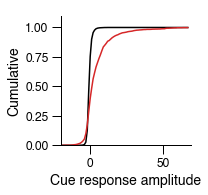

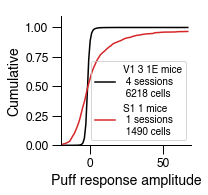

In [62]:
# Doing the selection manually to not choose multiple runs from the same session
exp_s1 = [('171201_EV038_2P_S1_JC','run01_closedLoopActuator'),]
         #('181008_JC079_2P_JC','run00_closedLoopActuator')]
exp_v1 = [('171201_EV038_2P_V1_JC','run00_closedLoopActuator'),
          ('180208_JC060_2P_JC','run01_closedLoopActuator'),
          ('180209_SK072_2P_JC','run07_closedLoopActuator'),
          ('180212_SK072_2P_JC','run05_closedLoopActuator')]

exp_s1 = [dict(session_name = s[0],session_subname = s[1]) for s in exp_s1]
exp_v1 = [dict(session_name = s[0],session_subname = s[1]) for s in exp_v1]

cue_s1 = [];puff_s1 = [];cue_v1 = [];puff_v1 = [];mouse_s1 = [];mouse_v1 = []
for k in exp_s1:
    c,p,m = (PositionMapsStats.ActivityMapStats()*StimulusAirPuff.Triggered() & k).fetch(
        'cue_amplitude',
        'puff_response_amplitude','mouse_id')
    print(k,len(c))
    cue_s1.extend(c)
    puff_s1.extend(p)
    mouse_s1.extend(m)
for k in exp_v1:
    c,p,m = (PositionMapsStats.ActivityMapStats()*StimulusAirPuff.Triggered() & k).fetch(
        'cue_amplitude',
        'puff_response_amplitude','mouse_id')
    print(k,len(c))
    cue_v1.extend(c)
    puff_v1.extend(p)
    mouse_v1.extend(m)
    

edges = np.arange(-20,70,1)
ncells_s1 = len(cue_s1)
ncells_v1 = len(cue_v1)
%matplotlib inline
# Cue response amplitude
bins_s1,ed = np.histogram(cue_s1,edges)
bins_v1,ed = np.histogram(cue_v1,edges)
fig = plt.figure(figsize = [3,3]);fig.add_axes([.3,.3,.6,.6])
plt.plot(ed[:-1]-np.diff(ed[:2]),np.cumsum(bins_v1)/ncells_v1)
plt.plot(ed[:-1]-np.diff(ed[:2]),np.cumsum(bins_s1)/ncells_s1)
plt.ylabel('Cumulative')
plt.xlabel('Cue response amplitude')
plt.ylim([0,1.1]);plt.xlim([edges[0],edges[-1]])
plt.xlim([edges[0],edges[-1]])
# Puff response amplitude
bins_s1,ed = np.histogram(puff_s1,edges)
bins_v1,ed = np.histogram(puff_v1,edges)
fig = plt.figure(figsize = [3,3]);fig.add_axes([.3,.3,.6,.6])
plt.plot(ed[:-1]-np.diff(ed[:2]),np.cumsum(bins_v1)/ncells_v1,
         label='V1 {0} 1E mice\n {1} sessions\n {2} cells'.format(len(np.unique(mouse_v1)),
                                                               len(exp_v1),
                                                               ncells_v1))
plt.plot(ed[:-1]-np.diff(ed[:2]),np.cumsum(bins_s1)/ncells_s1,
         label='S1 {0} mice\n {1} sessions\n {2} cells'.format(len(np.unique(mouse_s1)),
                                                               len(exp_s1),
                                                               ncells_s1))
plt.ylabel('Cumulative')
plt.xlabel('Puff response amplitude')
plt.ylim([0,1.1]);plt.xlim([edges[0],edges[-1]])
plt.legend();


### Scatter of cue versus puff response amplitude in V1 and S1


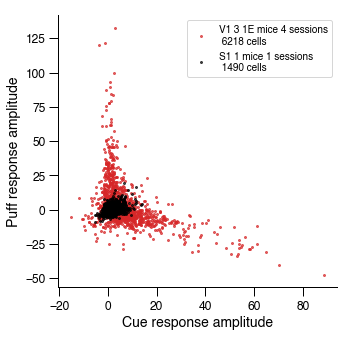

In [63]:
%matplotlib inline
plt.figure(figsize = [5,5])
plt.plot(cue_s1,puff_s1,'.',color = colors[1],alpha = 0.7,
        label='V1 {0} 1E mice {1} sessions\n {2} cells'.format(len(np.unique(mouse_v1)),
                                                               len(exp_v1),
                                                               ncells_v1))
plt.plot(cue_v1,puff_v1,'.',color = colors[0],alpha = 0.7,
         label='S1 {0} mice {1} sessions\n {2} cells'.format(len(np.unique(mouse_s1)),
                                                               len(exp_s1),
                                                               ncells_s1))
plt.xlabel('Cue response amplitude')
plt.ylabel('Puff response amplitude')

plt.legend();

## Debugging

### Plot the mean cue response versus the mean cue response with offset and the peak cue response
This can be problematic; need to confirm later.

The peak response does not make sense as used; need to use the mean. 
Dataset 181008_JC079_2P_JC might be noisy; need to check df_f.

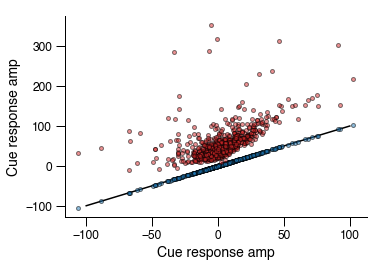

In [89]:
dd = (PositionMaps.ActivityMaps()*PositionMapsStats.ActivityMapStats()*StimulusAirPuff.Triggered()
      *TwoPhotonVolume()&'session_name = "181008_JC079_2P_JC"' & 'plane  = 0' & 'run_num = 0').fetch()

cuemaps = np.stack(dd['cue_maps'])
resp_amps,b,r = computeMeanResponse(cuemaps[:,1,:,:],
                                    ctime,
                                    stimduration = 1.,
                                    offset = 0.1, 
                                    baselinetime = -0.5,
                                    fullOutput = 1)
resp_amps_no_offset,b,r = computeMeanResponse(cuemaps[:,1,:,:],
                                    ctime,
                                    stimduration = 1.,
                                    offset = 0., 
                                    baselinetime = -0.5,
                                    fullOutput = 1)
peak_resp_amps,b,r = computePeakResponse(cuemaps[:,1,:,:],
                                         ctime,
                                         stimduration = 1.,
                                         offset = 0.1, 
                                         baselinetime = -0.5,
                                         fullOutput = 1)
%matplotlib inline
fig = plt.figure()
fig.add_axes([0.2,0.2,0.7,0.7])
plt.plot([-100,100],[-100,100])
plt.plot(resp_amps,resp_amps_no_offset,'ko',markerfacecolor = colors[2],alpha = 0.5)
plt.plot(resp_amps,peak_resp_amps,'ko',markerfacecolor = colors[1],alpha = 0.5)
plt.xlabel('Cue response amp')
plt.ylabel('Cue response amp');

In [ ]:
from djexpcode.schemas import *
PositionMapsStats().populate(display_progress = True)

### Plot df/f maps for an experiment run

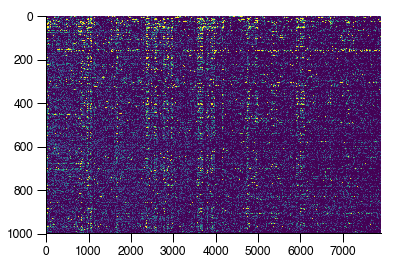

In [67]:
from djexpcode.schemas import *
dd = (Segmentation.Traces()*TwoPhotonVolume()&'session_name = "181008_JC079_2P_JC"' & 'plane  = 0' & 'run_num = 0').fetch()
%matplotlib inline
t1 = np.stack(dd['df_f'])
plt.imshow(t1,aspect = 'auto',clim = [0,150]);

(3000, 4500)

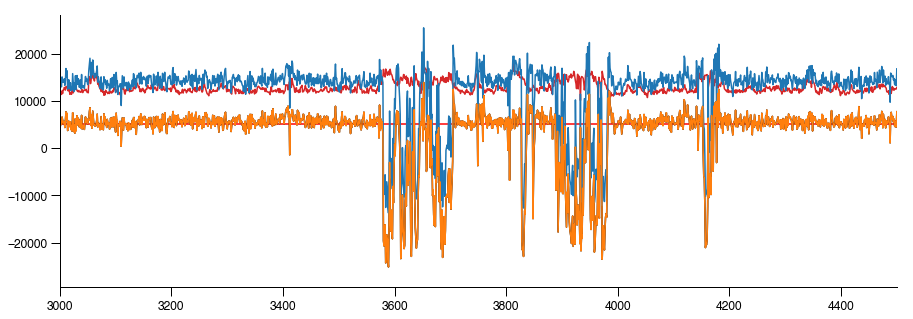

In [133]:
# This is to analyse that problem... need to run reg and seg again to be sure.
segdat = getROIsFromSuite2p("181008_JC079_2P_JC",'run00_closedLoopActuator',0,channel=0)
t2 = segdat[4]
%matplotlib inline
t3 = ((t2.T - np.nanmedian(t2,axis = 1))/np.nanmedian(t2,axis = 1)).T 
icell = 10
plt.figure(figsize = [15,5])
plt.plot(t2[icell])
plt.plot(segdat[5][icell])
plt.plot(segdat[6][icell])
plt.plot(segdat[6][icell] - 0.7*segdat[5][icell])
plt.hlines(np.nanmedian(t2,axis = 1)[icell],0,7500,color = 'r')
plt.xlim([3000,4500]);